In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('exam_test.csv')

In [9]:
data.drop(['EthnicGroup', 'ParentEduc', 'TestPrep', 'LunchType', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours'], axis=1, inplace=True)
data

,Unnamed: 0,Gender,MathScore,ReadingScore,WritingScore
0,0,female,71,71,74
1,1,female,69,90,88
2,2,female,87,93,91
3,3,male,45,56,42
4,4,male,76,78,75
...,...,...,...,...,...
30636,816,female,59,61,65
30637,890,male,58,53,51
30638,911,female,61,70,67
30639,934,female,82,90,93


Hasil metode Elbow:
Jumlah Cluster (k=1): Inertia = 122564.00000000036
Jumlah Cluster (k=2): Inertia = 86821.53722299261
Jumlah Cluster (k=3): Inertia = 48502.01933359291
Jumlah Cluster (k=4): Inertia = 32956.41194420708
Jumlah Cluster (k=5): Inertia = 26134.005550435308
Jumlah Cluster (k=6): Inertia = 19140.424156175948
Jumlah Cluster (k=7): Inertia = 16366.069337422145
Jumlah Cluster (k=8): Inertia = 13572.44745161663
Jumlah Cluster (k=9): Inertia = 12067.268175828449
Jumlah Cluster (k=10): Inertia = 10653.414351754014


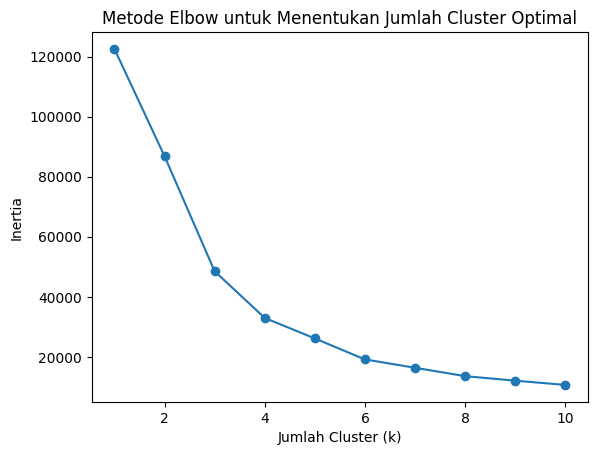

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


df = data

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # female = 0, male = 1

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Gender', 'MathScore', 'ReadingScore', 'WritingScore']])

# Tentukan jumlah cluster dengan metode Elbow
inertia = []
K_range = range(1, 11)

print("Hasil metode Elbow:")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia_value = kmeans.inertia_
    inertia.append(inertia_value)
    print(f"Jumlah Cluster (k={k}): Inertia = {inertia_value}")

# Plot untuk melihat titik "Elbow"
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()


   Gender  MathScore  ReadingScore  WritingScore  Cluster
0       0         71            71            74        0
1       0         69            90            88        2
2       0         87            93            91        2
3       1         45            56            42        1
4       1         76            78            75        2


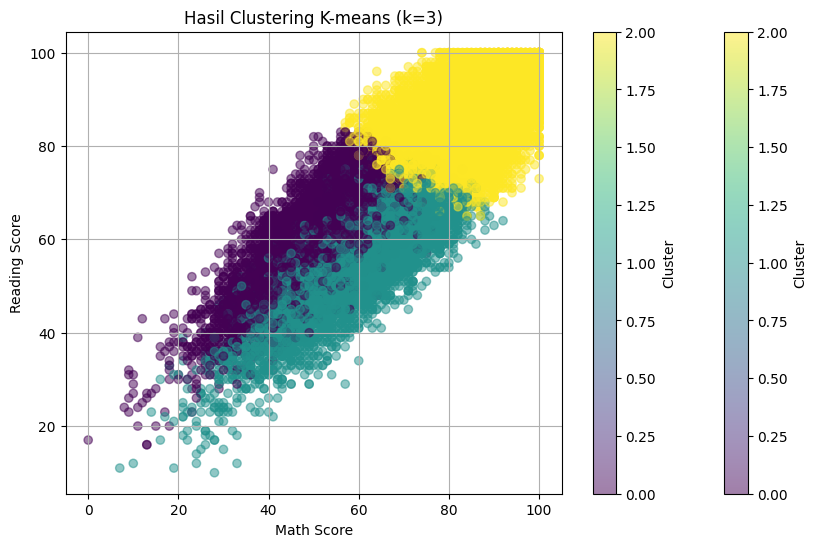

In [11]:
# Modeling K-means dengan k=3
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Tampilkan beberapa data beserta cluster-nya
print(df[['Gender', 'MathScore', 'ReadingScore', 'WritingScore', 'Cluster']].head())


plt.figure(figsize=(10, 6))
plt.scatter(df['MathScore'], df['ReadingScore'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')  
plt.title('Hasil Clustering K-means (k=3)')
plt.colorbar(label='Cluster')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


   Gender  MathScore  ReadingScore  WritingScore  Cluster
0       0         71            71            74        0
1       0         69            90            88        2
2       0         87            93            91        2
3       1         45            56            42        1
4       1         76            78            75        2


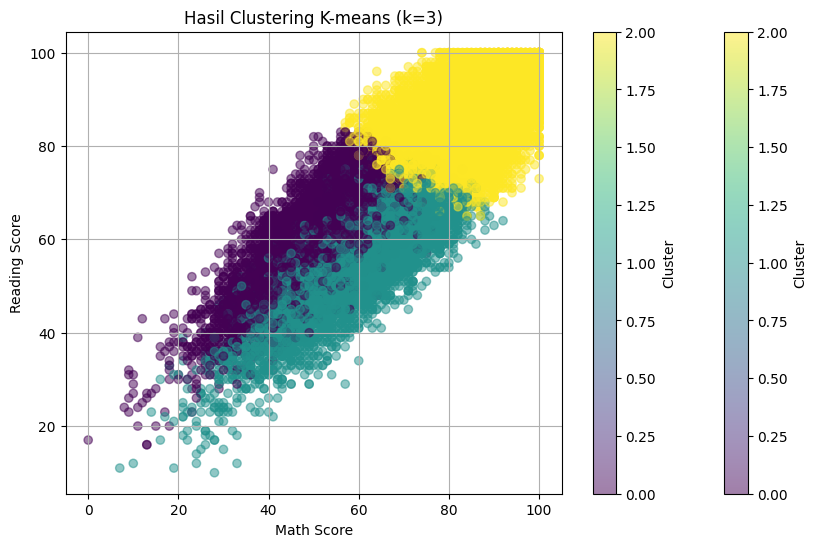

In [12]:
# Modeling K-means dengan k=3
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Tampilkan beberapa data beserta cluster-nya
print(df[['Gender', 'MathScore', 'ReadingScore', 'WritingScore', 'Cluster']].head())


plt.figure(figsize=(10, 6))
plt.scatter(df['MathScore'], df['ReadingScore'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')  
plt.title('Hasil Clustering K-means (k=3)')
plt.colorbar(label='Cluster')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouette = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score untuk k=3: {silhouette}')


db_index = davies_bouldin_score(df_scaled, df['Cluster'])
print(f'Davies-Bouldin Index untuk k=3: {db_index}')


# Menentukan centroid
centroids = kmeans.cluster_centers_

# Visualisasi centroid
plt.scatter(df['MathScore'], df['ReadingScore'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Hasil Clustering K-means dengan Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()
